# FaceMask Recognition using Deep Learning

### Steps:

#### 1. Importing Dataset
#### 2. Preprocessing Dataset
#### 3. Model Generate using Keras
#### 4. Model Save

In [1]:
#import required libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading image
img = cv2.imread('D:/Deep Learning Projects/Face Mask Dataset/Face-Mask-Detection-master/dataset/with_mask/0_0_0 copy 4 2.jpg')
#Converting BGR to RGB format
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

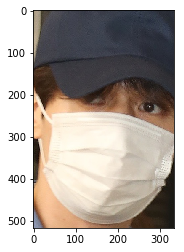

In [3]:
#Plot/show image
plt.imshow(img)

In [4]:
#importing image data generator for preprocessing
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [5]:
# Setting parameters of Image Data Generator for preprocessing  
img_gen = ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.1,
                             zoom_range=0.1,
                             fill_mode='nearest',
                             horizontal_flip=True,
                             rescale=1/255)

In [12]:
#Selecting directory and Target size for image preprocessing
img_train_gen = img_gen.flow_from_directory('D:/Deep Learning Projects/Face Mask Dataset/Face-Mask-Detection-master/dataset'
                                            ,target_size=(256, 256)
                                            ,class_mode='binary'
                                            ,batch_size=32)

Found 3833 images belonging to 2 classes.


In [14]:
#Importing model and Layers for Deep Learning

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [15]:
model = Sequential()

#Adding two Convolution-2D Layer and Maxpooling2D Layer
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(256,256,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(256,256,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flattening the data
model.add(Flatten())

#Adding Dense and Dropout Layer 
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

#Compiling Model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
#Model Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               31490176  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [17]:
#Checking the indices for face mask detection
img_train_gen.class_indices

{'with_mask': 0, 'without_mask': 1}

In [19]:
#Training the model for image dataset
result = model.fit_generator(img_train_gen,epochs=5)

Epoch 1/5
120/120 [==============================] - 300s 3s/step - loss: 0.2375 - acc: 0.9082
Epoch 2/5
120/120 [==============================] - 298s 2s/step - loss: 0.2611 - acc: 0.9033
Epoch 3/5
120/120 [==============================] - 300s 2s/step - loss: 0.2131 - acc: 0.9230
Epoch 4/5
120/120 [==============================] - 301s 3s/step - loss: 0.2319 - acc: 0.9169
Epoch 5/5
120/120 [==============================] - 296s 2s/step - loss: 0.2159 - acc: 0.9178


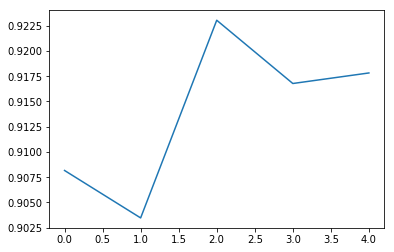

In [20]:
#Plotting the Accuracy Graph of Model
plt.plot(result.history['acc'])

#Hense we can say that accuracy of the model is 91-92%

In [21]:
#Saving model for realtime processing
model.save('FaceMask_epoch_Acc91.h5')